Загрузите датасет "SMSSpamCollection" с помощью функции pandas.read_csv:

In [1]:
import pandas as pd

dataset_path = r"C:\Users\uumk0\Downloads\SMSSpamCollection"
df = pd.read_csv(dataset_path, sep='\t', header=None, names=['label', 'message'])


Подготовьте данные для обучения:
Преобразуйте метки классов в числовой формат, например, 1 для спама и 0 для не спама:

In [2]:
df['label'] = df['label'].map({'spam': 1, 'ham': 0})


Разделите данные на обучающую и тестовую выборки:

In [3]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Создайте и обучите модель однослойного персептрона:

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', Perceptron())
])

pipeline.fit(X_train, y_train)
vectorizer = pipeline.named_steps['vectorizer']
vocab_size = len(vectorizer.vocabulary_)
print(vocab_size)

7702


Примените обученную модель на примере письма из датасета и на собственном примере:

In [5]:
# Пример письма из датасета
example_email_1 = "URGENT! You have won a 1000$ cash prize. Claim it now!"
prediction_1 = pipeline.predict([example_email_1])[0]
print(f"Prediction for example email 1: {'spam' if prediction_1 == 1 else 'not spam'}")

# Собственный пример письма
example_email_2 = "Hi there, just wanted to remind you about our upcoming meeting."
prediction_2 = pipeline.predict([example_email_2])[0]
print(f"Prediction for example email 2: {'spam' if prediction_2 == 1 else 'not spam'}")


Prediction for example email 1: spam
Prediction for example email 2: not spam


Визуализируйте ROC-AUC кривую для модели:

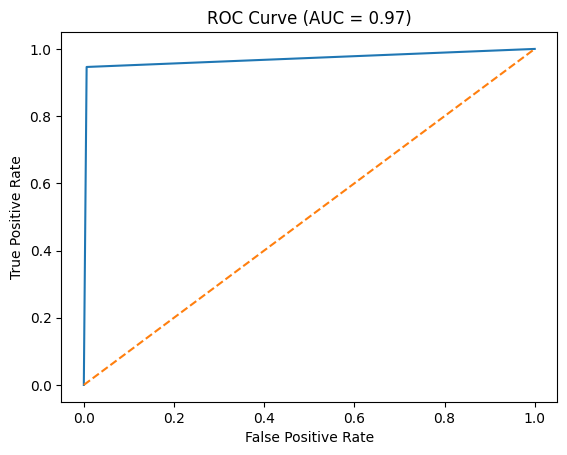

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_scores = pipeline.predict(X_test)
roc_auc = roc_auc_score(y_test, y_scores)


# Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.show()
